[Text(0, 0, '5115'),
 Text(0, 0, '1185'),
 Text(0, 0, '674'),
 Text(0, 0, '596'),
 Text(0, 0, '158'),
 Text(0, 0, '117'),
 Text(0, 0, '98'),
 Text(0, 0, '97')]

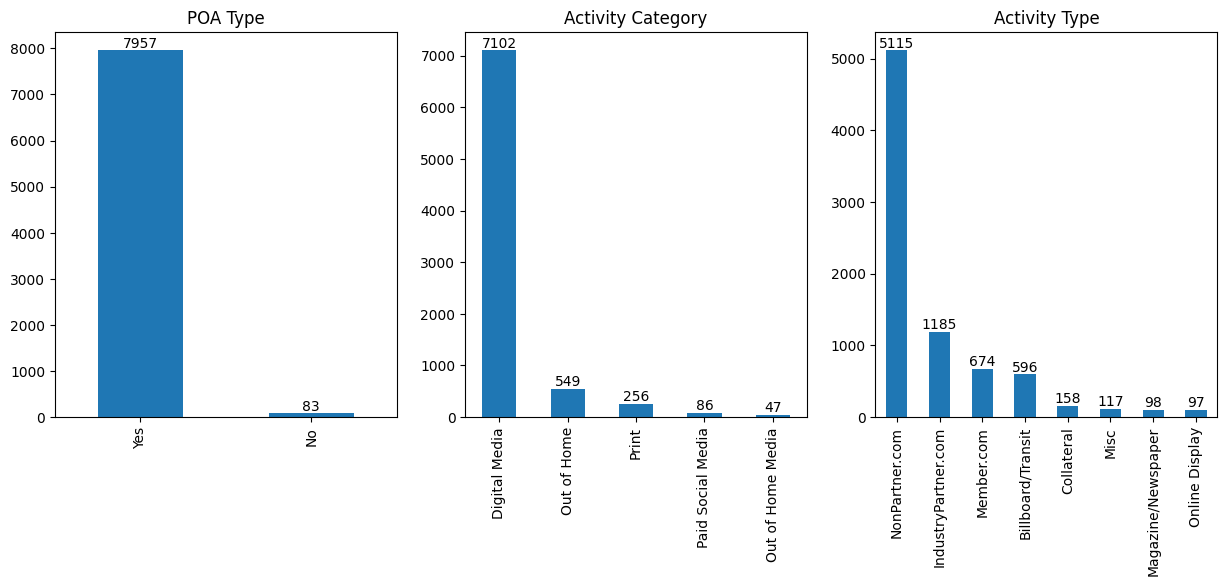

In [1]:
from src.analysis import aggergate_data
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax_p, ax_c, ax_t) = plt.subplots(1, 3, figsize=(20, 5))
stat_df = aggergate_data("data/TRAIN_images_metadata.csv")

stat_df["POA_attribution"].value_counts().plot(kind='bar', ax = ax_p, title="POA Type")
ax_p.bar_label(ax_p.containers[0])
stat_df["activity_category"].value_counts().plot(kind='bar', ax=ax_c, title="Activity Category")
ax_c.bar_label(ax_c.containers[0])
stat_df["activity_type"].value_counts().plot(kind='bar', ax=ax_t, title="Activity Type")
ax_t.bar_label(ax_t.containers[0])

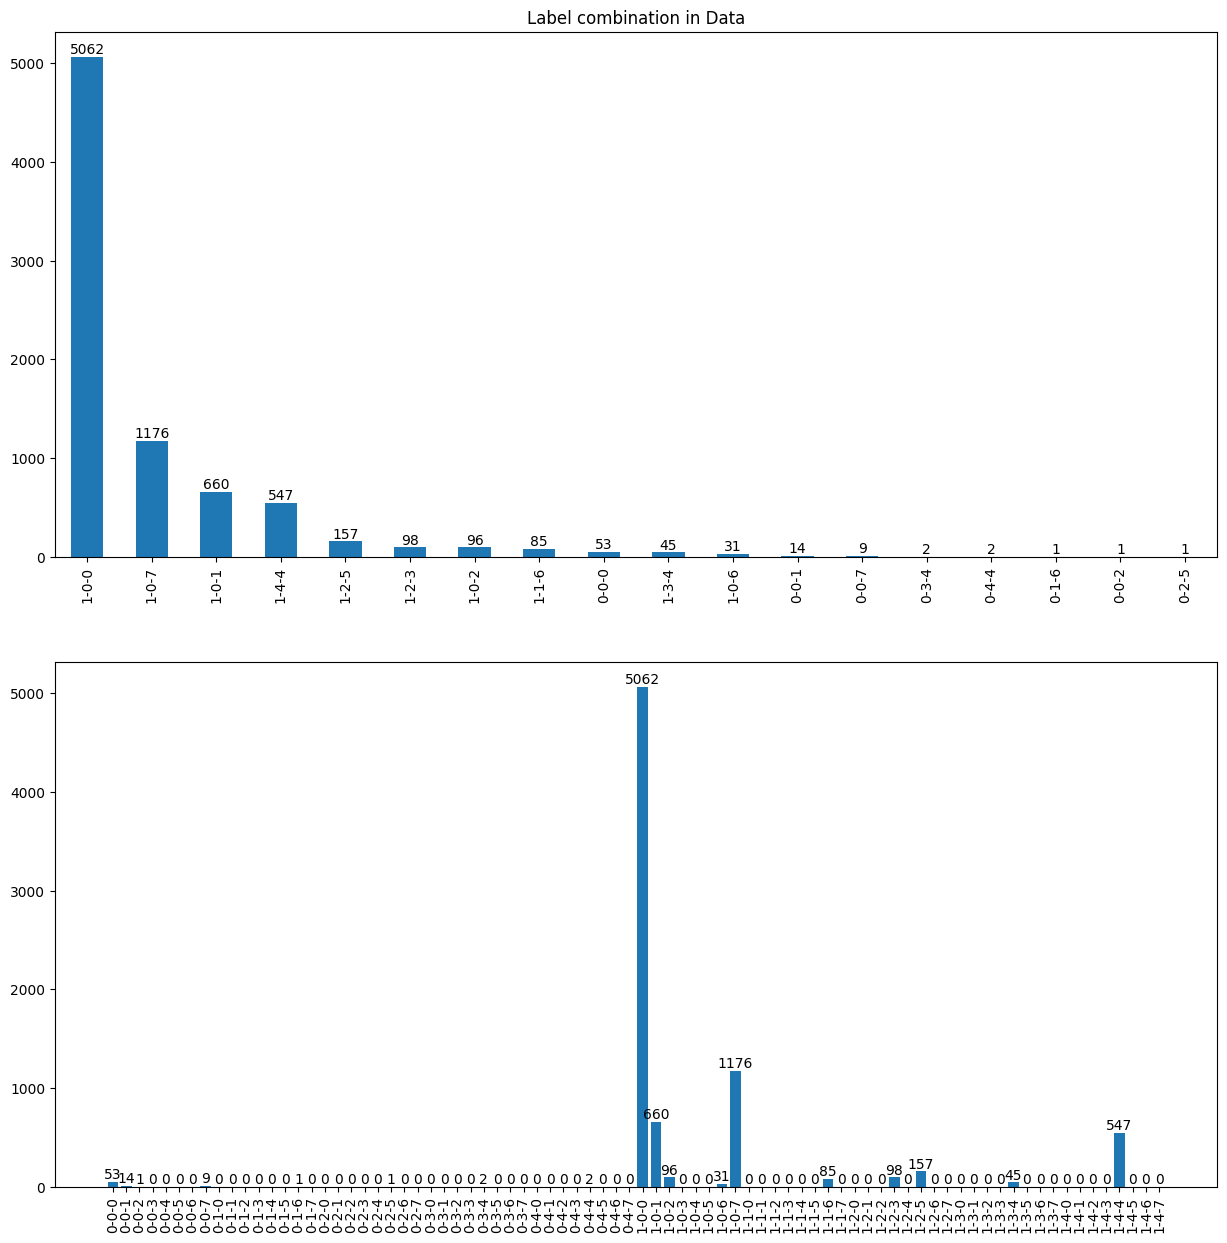

In [5]:
from src.analysis import get_label_map
from itertools import product

label_map = get_label_map()

# change to int labels
stat_df["POA_attribution_label"] = stat_df["POA_attribution"].apply(lambda el: label_map["POA_attribution_map"][el])
stat_df["activity_category_label"] = stat_df["activity_category"].apply(lambda el: label_map["activity_category_map"][el])
stat_df["activity_type_label"] = stat_df["activity_type"].apply(lambda el: label_map["activity_type_map"][el])

stat_df['combined_label'] = stat_df[["POA_attribution_label","activity_category_label","activity_type_label"]].astype(str).agg('-'.join, axis=1)
possible_labels = list(product(label_map["POA_attribution_map"].values(), 
                               label_map["activity_category_map"].values(), 
                               label_map["activity_type_map"].values()))
possible_lable_str = ['-'.join([str(l) for l in lab]) for lab in possible_labels]

fig, (ax_ext, ax_all) = plt.subplots(2,1,figsize=(15,15))

s_vc = stat_df['combined_label'].value_counts()
s_vc.plot(kind='bar', ax=ax_ext, title="Label combination in Data")
ax_ext.bar_label(ax_ext.containers[0])

ax_all.bar(x=possible_lable_str, height=[s_vc[idx] if idx in s_vc.index else 0 for idx in possible_lable_str])
ax_all.bar_label(ax_all.containers[0])
ax_all.tick_params(axis='x', labelrotation = 90)


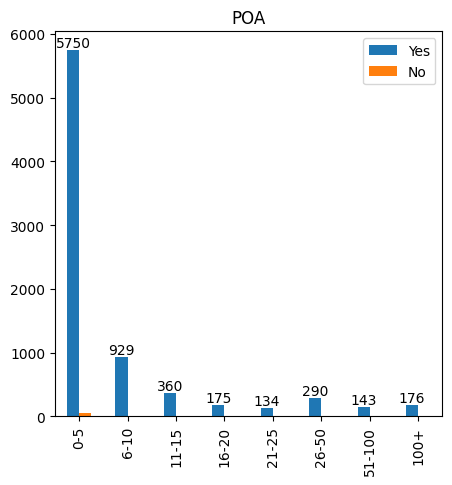

In [37]:
import numpy as np
fig, ax_img = plt.subplots( figsize=(5,5))

bin_range = [0,5,10,15,20,25,50,100,np.inf]
bin_label = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-50", "51-100", "100+"]

poa_df = pd.DataFrame(columns=["Yes", "No"])
poa_df["Yes"] = pd.cut(stat_df[stat_df["POA_attribution_label"] == 1]["image_name"].apply(len), bins= bin_range, labels=bin_label).value_counts().sort_index(axis=0)
# poa_yes_df.value_counts().sort_index(axis=0).plot(kind='bar', label='POA Yes', ax = ax_img)

poa_df["No"]  = pd.cut(stat_df[stat_df["POA_attribution_label"] == 0]["image_name"].apply(len), bins= bin_range, labels=bin_label).value_counts().sort_index(axis=0)
poa_df.plot(kind='bar', title='POA', ax = ax_img)

ax_img.bar_label(ax_img.containers[0])
ax_img.tick_params(axis='x', labelrotation = 90)
plt.legend()

In [32]:
stat_df[stat_df["POA_attribution_label"] == 1]["image_name"].apply(len)

ref_id
00060420-005     4
00060435-003     4
00060864-006     4
00066206-002    11
00069748-002     1
                ..
00147483-001     8
00147483-002    58
00148093-001    18
00148766-001     1
00148767-001     2
Name: image_name, Length: 7957, dtype: int64